In [20]:
BASE_DIR = "/content"

# 1. MLB BASEBALL HOMERUN PREDICTION

In [21]:
# !pip install pybaseball

## Data Fetching, Cleaning, PreProcessing  (uncomment to scrap data from 0)

In [22]:
# # Final with cleaning and replacing uids #may need t combine session wise file do not rely on combined file from this script

# import pandas as pd
# from pybaseball import statcast
# from tqdm import tqdm
# import time
# import numpy as np
# import os

# # ---- CONFIGURATION ----
# START_YEAR = 2018
# END_YEAR = 2023
# OUTPUT_DIR = BASE_DIR + "/statcast_data"
# os.makedirs(OUTPUT_DIR, exist_ok=True)

# # ---- FILTER CRITERIA ----
# INCLUDE_DESCRIPTIONS = [
#     'hit_into_play',
#     'hit_into_play_no_out',
#     'hit_into_play_score'
# ]

# EXCLUDE_EVENTS = [
#     'bunt_foul_tip',
#     'bunt_groundout',
#     'bunt_lineout',
#     'bunt_popout',
#     'bunt_foul',
#     'sac_bunt',
#     'sac_bunt_double_play',
#     'bunt_foul_tip',
#     'bunt_foul',
#     'missed_bunt',
#     'foul_bunt',
#     'foul_tip'
# ]

# # ---- COLUMN STRUCTURE ----
# FINAL_COLUMNS = [
#     'uid', 'home_team', 'sz_top', 'sz_bot', 'pitch_type',
#     'release_pos_x', 'release_pos_y', 'release_pos_z', 'stand', 'p_throws',
#     'inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes',
#     'pitch_number', 'at_bat_number', 'if_fielding_alignment', 'of_fielding_alignment',
#     'on_3b', 'on_2b', 'on_1b', 'release_speed', 'spin_axis', 'release_spin_rate',
#     'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'hc_x', 'hc_y',
#     'launch_speed', 'launch_angle', 'is_hr'
# ]

# def get_monthly_date_ranges(year):
#     """Generate first-last day of each month for filtering"""
#     return [(f"{year}-{month:02d}-01",
#              f"{year}-{month:02d}-{28 if month == 2 else 30}")
#             for month in range(1, 13)]

# def fetch_batted_balls(start_date, end_date):
#     """Fetch only batted balls that match our criteria"""
#     for attempt in range(3):
#         try:
#             # First get all data for the date range
#             data = statcast(start_dt=start_date, end_dt=end_date)

#             if data.empty:
#                 return pd.DataFrame()

#             # Apply filters
#             filtered = data[
#                 (data['description'].isin(INCLUDE_DESCRIPTIONS)) &
#                 (~data['events'].isin(EXCLUDE_EVENTS)) &
#                 (data['hc_x'].notna()) &  # Must have hit coordinates
#                 (data['hc_y'].notna())
#             ]

#             return filtered

#         except Exception as e:
#             print(f"Attempt {attempt+1} failed: {str(e)}")
#             time.sleep(5)
#     return pd.DataFrame()

# def transform_to_final_format(raw_df):
#     """Convert raw data to exact desired format"""
#     if raw_df.empty:
#         return pd.DataFrame(columns=FINAL_COLUMNS)

#     # Create new DataFrame with our structure
#     df = pd.DataFrame()

#     # Direct mapping columns
#     direct_map = {
#         'game_pk': 'uid',
#         'home_team': 'home_team',
#         'sz_top': 'sz_top',
#         'sz_bot': 'sz_bot',
#         'pitch_type': 'pitch_type',
#         'release_pos_x': 'release_pos_x',
#         'release_pos_y': 'release_pos_y',
#         'release_pos_z': 'release_pos_z',
#         'stand': 'stand',
#         'p_throws': 'p_throws',
#         'inning': 'inning',
#         'inning_topbot': 'inning_topbot',
#         'outs_when_up': 'outs_when_up',
#         'balls': 'balls',
#         'strikes': 'strikes',
#         'pitch_number': 'pitch_number',
#         'at_bat_number': 'at_bat_number',
#         'if_fielding_alignment': 'if_fielding_alignment',
#         'of_fielding_alignment': 'of_fielding_alignment',
#         'release_speed': 'release_speed',
#         'spin_axis': 'spin_axis',
#         'release_spin_rate': 'release_spin_rate',
#         'pfx_x': 'pfx_x',
#         'pfx_z': 'pfx_z',
#         'plate_x': 'plate_x',
#         'plate_z': 'plate_z',
#         'hc_x': 'hc_x',
#         'hc_y': 'hc_y',
#         'launch_speed': 'launch_speed',
#         'launch_angle': 'launch_angle'
#     }

#     for src, dest in direct_map.items():
#         if src in raw_df.columns:
#             df[dest] = raw_df[src]

#     # Handle boolean columns for base runners
#     for base in ['1b', '2b', '3b']:
#         df[f'on_{base}'] = raw_df[f'on_{base}'].notna()

#     # Create is_hr column
#     df['is_hr'] = (raw_df['events'] == 'home_run').astype(int)

#     # Ensure all columns are present
#     for col in FINAL_COLUMNS:
#         if col not in df.columns:
#             df[col] = None

#     return df[FINAL_COLUMNS]

# def process_year(year):
#     """Process a single year of data"""
#     all_data = []
#     date_ranges = get_monthly_date_ranges(year)

#     print(f"\nDownloading batted balls for {year} ({len(date_ranges)} months)...")
#     for start_date, end_date in tqdm(date_ranges, desc=f"{year}"):
#         raw_data = fetch_batted_balls(start_date, end_date)
#         if not raw_data.empty:
#             processed = transform_to_final_format(raw_data)
#             all_data.append(processed)
#         time.sleep(2)  # Be kind to MLB servers

#     if not all_data:
#         print(f"No data retrieved for {year}!")
#         return None

#     final_df = pd.concat(all_data).sort_values('uid').reset_index(drop=True)
#     return final_df

# def clean_and_renumber_data(yearly_data):
#     """
#     NEW FUNCTION: Processes data before saving to:
#     1. Drop rows with any missing values
#     2. Assign sequential UIDs (0 to N-1)
#     Returns cleaned yearly DataFrames
#     """
#     # Combine all data for cleaning
#     combined = pd.concat([df for df in yearly_data.values() if df is not None])

#     # Drop rows with any missing values
#     cleaned = combined.dropna(how='any')
#     print(f"\nData cleaning:")
#     print(f" - Original rows: {len(combined)}")
#     print(f" - Rows kept: {len(cleaned)} ({len(cleaned)/len(combined):.1%})")

#     # Assign new sequential UIDs
#     cleaned['uid'] = range(len(cleaned))

#     # Split back into yearly DataFrames
#     cleaned_yearly = {}
#     start_idx = 0
#     for year, df in yearly_data.items():
#         if df is not None:
#             end_idx = start_idx + len(df.dropna(how='any'))
#             cleaned_yearly[year] = cleaned.iloc[start_idx:end_idx].copy()
#             start_idx = end_idx

#     return cleaned_yearly

# def main():
#     yearly_data = {}

#     # Step 1: Collect raw data (original process)
#     for year in range(START_YEAR, END_YEAR + 1):
#         yearly_data[year] = process_year(year)

#     # Step 2: Clean and renumber (new process)
#     yearly_data = clean_and_renumber_data(yearly_data)

#     # Step 3: Save files (original process)
#     for year, df in yearly_data.items():
#         if df is not None:
#             output_file = os.path.join(OUTPUT_DIR, f"statcast_batted_balls_{year}.csv")
#             df.to_csv(output_file, index=False)
#             print(f"Saved {len(df)} rows to {output_file}")

#     # Save combined file
#     combined_df = pd.concat([df for df in yearly_data.values() if df is not None])
#     combined_file = os.path.join(OUTPUT_DIR, "statcast_batted_balls_ALL.csv")
#     combined_df.to_csv(combined_file, index=False)
#     print(f"\nCombined all years into {combined_file} ({len(combined_df)} rows)")
#     print(f"UID range: {combined_df['uid'].min()} to {combined_df['uid'].max()}")

# if __name__ == "__main__":
#     main()

In [23]:
# # import pandas as pd
# # from sklearn.model_selection import train_test_split
# # import os

# # input_path = '/content/statcast_data'  # Directory containing CSV files
# # multiple_files = True  # False  # Set to True if using multiple files

# # # Load dataset
# # def readData():
# #     if multiple_files:
# #         # Read all CSV files in directory
# #         print(f"Looking for CSV files in: {input_path}")
# #         all_files = [os.path.join(input_path, f) for f in os.listdir(input_path)
# #                     if f.endswith('.csv')]
# #         print(f"Found {len(all_files)} CSV files")

# #         # Combine all files
# #         data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
# #         print(f"Combined {len(all_files)} files into DataFrame")
# #         return data
# #     else:
# #         # Read single file
# #         data = pd.read_csv('/content/statcast_batted_balls_2022.csv')
# #         print("Loaded single CSV file")
# #         return data

# # data = readData()
# # #check and drop missing vals
# # original_row_count = len(data)
# # # Drop rows with any missing values
# # data = data.dropna()
# # # Calculate percentage of rows removed
# # dropped_percentage = (original_row_count - len(data)) / original_row_count
# # # Raise error if more than 40% dropped
# # if dropped_percentage > 0.40:
# #     raise ValueError(f"Too much data removed! Dropped {dropped_percentage:.2%} of rows.")


# # # Split into train and test (80% train, 20% test by default)
# # train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# # # Save to CSV files
# # train_data.to_csv('/content/statcast_data/train.csv', index=False)
# # test_data.to_csv('/content/statcast_data/b_test.csv', index=False)

# # print(f"Train set shape: {train_data.shape}")
# # print(f"Test set shape: {test_data.shape}")
# # print("Files saved as 'train.csv' and 'test.csv'")

# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split

# input_path = BASE_DIR + "/statcast_data"  # Directory containing CSV files (must have no missing values)

# csv_files = [os.path.join(input_path, f) for f in os.listdir(input_path) if f.endswith('.csv')]
# print(f"Found {len(csv_files)} CSV files to merge.")

# df_list = []
# for idx, file in enumerate(csv_files, 1):
#     print(f"Reading file {idx}/{len(csv_files)}: {os.path.basename(file)}")
#     df = pd.read_csv(file)
#     df_list.append(df)

# print("Merging all files into a single DataFrame...")
# data = pd.concat(df_list, ignore_index=True)
# data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# print("Checking for missing values...")
# if data.isnull().any().any():
#     missing_rows = data[data.isnull().any(axis=1)]
#     print(f"Error: Found {len(missing_rows)} rows with missing values.")
#     print(missing_rows.head())
#     raise ValueError("Missing value rows found before saving.")

# print("Splitting into train and test sets...")
# train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# train_path = os.path.join(BASE_DIR, 'b_train.csv')
# test_path = os.path.join(BASE_DIR, 'b_test.csv')
# train_data.to_csv(train_path, index=False)
# test_data.to_csv(test_path, index=False)

# print(f"Train set shape: {train_data.shape}")
# print(f"Test set shape: {test_data.shape}")
# print(f"Files saved as '{train_path}' and '{test_path}'")

## DATA LOADING, Checking & Encoding

In [24]:
# !pip install --ignore-installed blinker --upgrade
# !pip install pycaret[full]

In [25]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from pycaret.classification import setup


train1=pd.read_csv(BASE_DIR + "/b_train.csv")
test1=pd.read_csv(BASE_DIR + "/b_test.csv")

# train1=pd.read_csv(BASE_DIR + "/b_train.csv").head(35000)
# test1=pd.read_csv(BASE_DIR + "/b_test.csv").head(8000)
train1.head()

,uid,home_team,sz_top,sz_bot,pitch_type,release_pos_x,release_pos_y,release_pos_z,stand,p_throws,...,release_spin_rate,pfx_x,pfx_z,plate_x,plate_z,hc_x,hc_y,launch_speed,launch_angle,is_hr
0,597596,BOS,3.61,1.66,SI,1.17,54.35,6.26,L,L,...,2156.0,1.48,0.29,-0.76,2.13,147.08,161.29,77.4,-11.0,0.0
1,267732,DET,3.55,1.63,FF,-1.43,53.90,5.57,R,R,...,2822.0,-0.70,1.58,0.61,2.42,184.62,102.18,97.7,51.0,0.0
2,21559,CIN,3.46,1.60,SI,-1.58,54.88,5.20,R,R,...,2176.0,-1.37,0.78,0.79,2.13,130.81,182.73,92.5,-14.0,0.0
3,272799,CIN,3.46,1.60,SL,-1.53,54.82,6.24,R,R,...,2473.0,0.18,0.61,0.88,2.59,127.37,41.21,102.8,24.0,0.0
4,633213,ATL,3.51,1.69,FF,-1.61,54.63,5.80,R,R,...,2167.0,-0.81,1.26,0.04,2.74,184.72,117.95,97.2,55.0,0.0


In [26]:
train1.isnull().any().sum(),test1.isnull().any().sum()

(0, 0)

In [27]:
def find(null):
    sum=pd.DataFrame(null.dtypes,columns=['data types'])
    sum['missing']=null.isnull().sum()
    sum['unique']=null.nunique()
    return sum
find(train1).style.background_gradient(cmap='tab20')

,data types,missing,unique
uid,int64,0,34014
home_team,object,0,30
sz_top,float64,0,146
sz_bot,float64,0,112
pitch_type,object,0,15
release_pos_x,float64,0,899
release_pos_y,float64,0,380
release_pos_z,float64,0,507
stand,object,0,2
p_throws,object,0,2


In [28]:
def fine(nulls):
    sum=pd.DataFrame(nulls.dtypes,columns=['data types'])
    sum['missing']=nulls.isnull().sum()
    sum['unique']=nulls.nunique()
    return sum
fine(test1).style.background_gradient(cmap='tab20')

,data types,missing,unique
uid,int64,0,7953
home_team,object,0,30
sz_top,float64,0,124
sz_bot,float64,0,95
pitch_type,object,0,14
release_pos_x,float64,0,760
release_pos_y,float64,0,318
release_pos_z,float64,0,357
stand,object,0,2
p_throws,object,0,2


<Axes: >

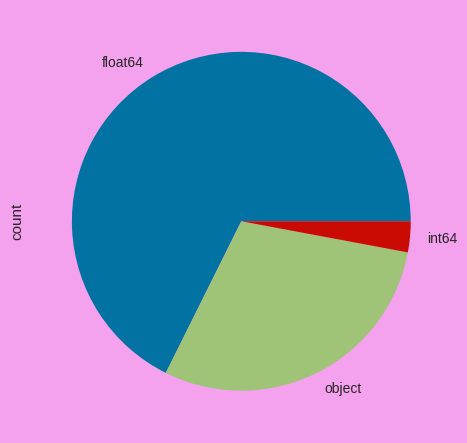

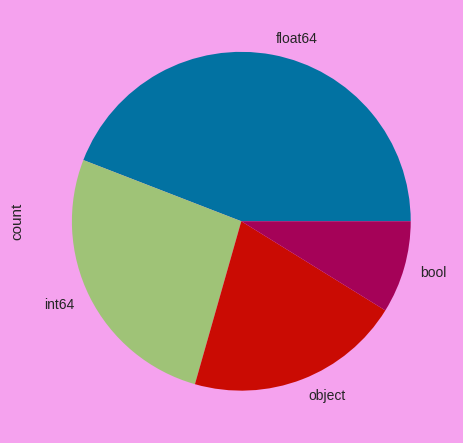

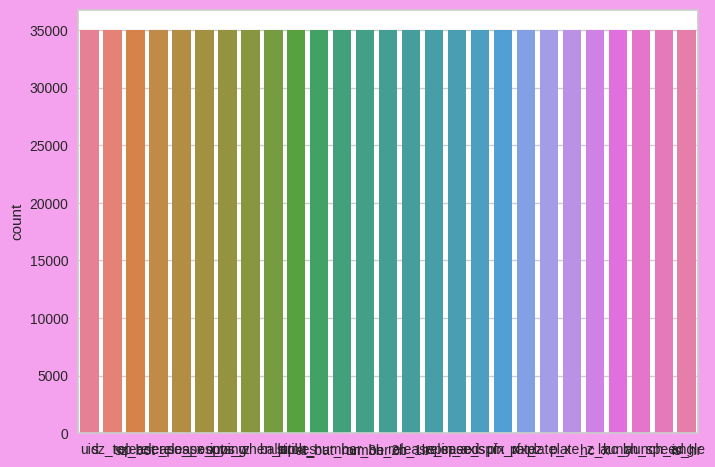

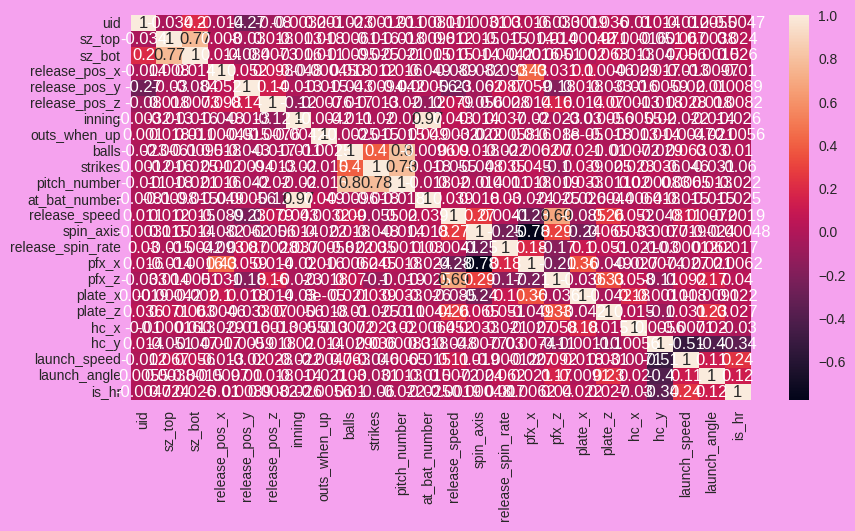

In [29]:
plt.figure(facecolor="#f5a2ee")
train1.dtypes.value_counts().plot(kind='pie')


plt.figure(facecolor="#f5a2ee")
test1.dtypes.value_counts().plot(kind='pie')

plt.figure(facecolor="#f5a2ee")
sns.countplot(data=train1)

plt.figure(facecolor="#f5a2ee",figsize=(10,5))
# print(test.dtypes)
numeric_df = test1.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),annot=True)

In [30]:
train1.columns,test1.columns

(Index(['uid', 'home_team', 'sz_top', 'sz_bot', 'pitch_type', 'release_pos_x',
        'release_pos_y', 'release_pos_z', 'stand', 'p_throws', 'inning',
        'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'pitch_number',
        'at_bat_number', 'if_fielding_alignment', 'of_fielding_alignment',
        'on_3b', 'on_2b', 'on_1b', 'release_speed', 'spin_axis',
        'release_spin_rate', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'hc_x',
        'hc_y', 'launch_speed', 'launch_angle', 'is_hr'],
       dtype='object'),
 Index(['uid', 'home_team', 'sz_top', 'sz_bot', 'pitch_type', 'release_pos_x',
        'release_pos_y', 'release_pos_z', 'stand', 'p_throws', 'inning',
        'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'pitch_number',
        'at_bat_number', 'if_fielding_alignment', 'of_fielding_alignment',
        'on_3b', 'on_2b', 'on_1b', 'release_speed', 'spin_axis',
        'release_spin_rate', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'hc_x',
        'hc_y', 'launch_sp

## Experiments & Selection

Train columns: ['uid', 'home_team', 'sz_top', 'sz_bot', 'pitch_type', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'stand', 'p_throws', 'inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'pitch_number', 'at_bat_number', 'if_fielding_alignment', 'of_fielding_alignment', 'on_3b', 'on_2b', 'on_1b', 'release_speed', 'spin_axis', 'release_spin_rate', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'hc_x', 'hc_y', 'launch_speed', 'launch_angle', 'is_hr']
Test columns: ['uid', 'home_team', 'sz_top', 'sz_bot', 'pitch_type', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'stand', 'p_throws', 'inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'pitch_number', 'at_bat_number', 'if_fielding_alignment', 'of_fielding_alignment', 'on_3b', 'on_2b', 'on_1b', 'release_speed', 'spin_axis', 'release_spin_rate', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'hc_x', 'hc_y', 'launch_speed', 'launch_angle', 'is_hr']


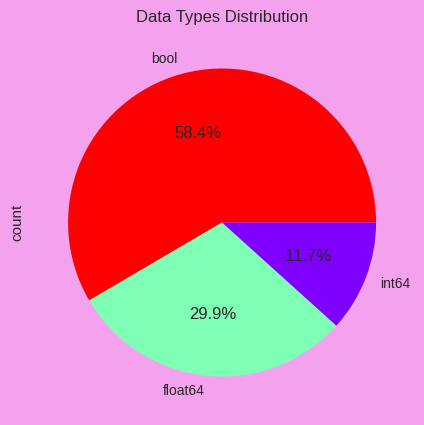

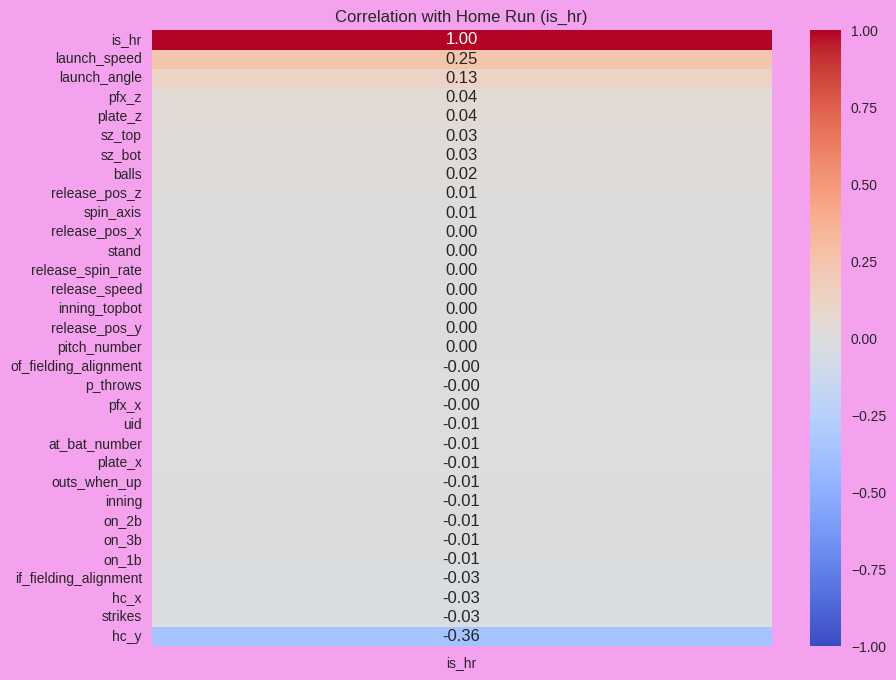

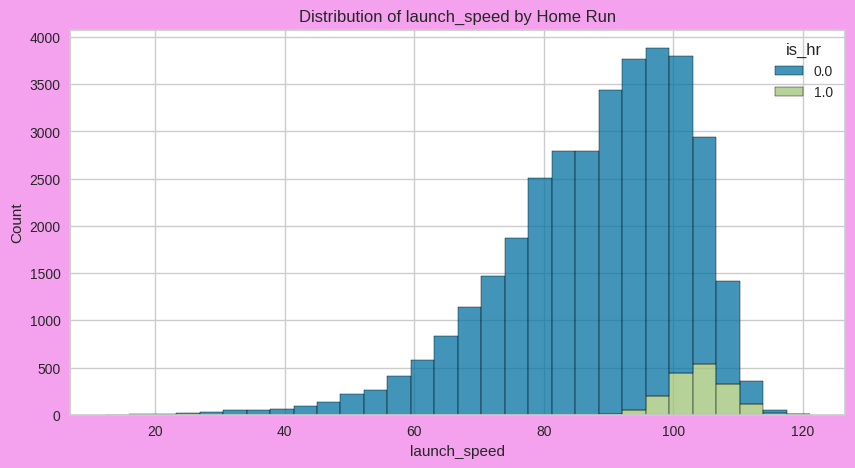

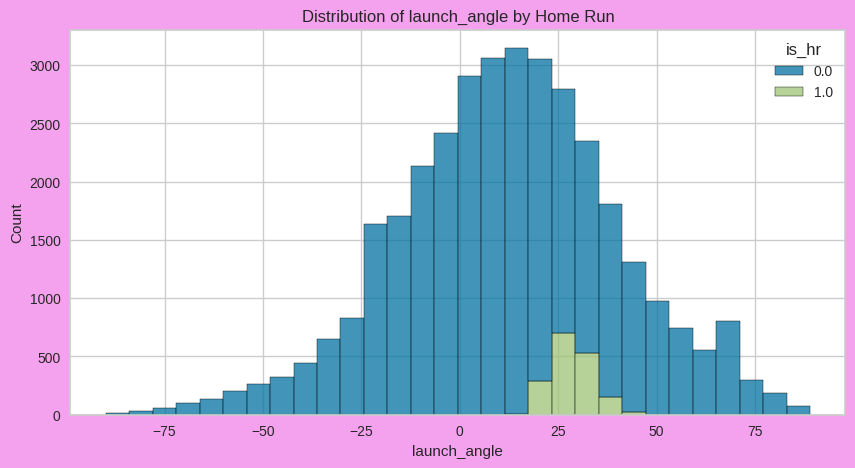

,Description,Value
0,Session id,1921
1,Target,is_hr
2,Target type,Binary
3,Original data shape,"(35000, 77)"
4,Transformed data shape,"(56654, 76)"
5,Transformed train set shape,"(46154, 76)"
6,Transformed test set shape,"(10500, 76)"
7,Ignore features,1
8,Numeric features,30
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9864,0.9958,0.8613,0.8601,0.8604,0.8533,0.8534,9.4810
lightgbm,Light Gradient Boosting Machine,0.9848,0.9954,0.8680,0.8271,0.8469,0.8389,0.8393,1.0070
xgboost,Extreme Gradient Boosting,0.9846,0.9952,0.8520,0.8343,0.8429,0.8348,0.8350,0.6410
gbc,Gradient Boosting Classifier,0.9794,0.9936,0.8974,0.7361,0.8087,0.7980,0.8024,10.3180
ada,Ada Boost Classifier,0.9756,0.9909,0.8638,0.7033,0.7751,0.7624,0.7670,2.0720
rf,Random Forest Classifier,0.9743,0.9885,0.7023,0.7524,0.7259,0.7124,0.7132,3.0150
dt,Decision Tree Classifier,0.9647,0.8426,0.7073,0.6205,0.6608,0.6423,0.6440,0.6750
et,Extra Trees Classifier,0.9696,0.9886,0.4046,0.9278,0.5628,0.5495,0.6012,1.3890
lr,Logistic Regression,0.9594,0.9635,0.5190,0.5936,0.5530,0.5318,0.5336,0.9120
svm,SVM - Linear Kernel,0.9475,0.9517,0.5140,0.5029,0.4950,0.4684,0.4753,0.3330


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [31]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pycaret.classification import *

train=train1
test=test1

# Verify train and test columns for consistency
print("Train columns:", train.columns.tolist())
print("Test columns:", test.columns.tolist())

# Label encoding for categorical features (excluding high-cardinality and boolean) (CONFIG-2)
categorical_cols = ['stand', 'p_throws', 'inning_topbot', 'if_fielding_alignment', 'of_fielding_alignment']
for col in categorical_cols:
    le = LabelEncoder()
    # Fit on union of train and test to ensure consistent encoding
    le.fit(pd.concat([train[col], test[col]], axis=0).astype(str))
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

# One-hot encoding for high-cardinality features: home_team, pitch_type
train = pd.get_dummies(train, columns=['home_team', 'pitch_type'], prefix=['home_team', 'pitch_type'])
test = pd.get_dummies(test, columns=['home_team', 'pitch_type'], prefix=['home_team', 'pitch_type'])
# Align train and test columns after one-hot encoding
train, test = train.align(test, join='left', axis=1, fill_value=0)

# Skip encoding for boolean columns (on_3b, on_2b, on_1b) as they're already 0/1
# Convert booleans to int for consistency
for col in ['on_3b', 'on_2b', 'on_1b']:
    train[col] = train[col].astype(int)
    test[col] = test[col].astype(int)

# Enhanced EDA: Data type distribution
plt.figure(figsize=(10, 5), facecolor="#f5a2ee")
train.dtypes.value_counts().plot(kind='pie', cmap="rainbow_r", autopct='%1.1f%%', title="Data Types Distribution")
plt.show()

# Enhanced EDA: Correlation heatmap focused on is_hr
plt.figure(figsize=(10, 8), facecolor="#f5a2ee")
# Select numeric columns for correlation
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
corr = train[numeric_cols].corr()[['is_hr']].sort_values(by='is_hr', ascending=False)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)
plt.title("Correlation with Home Run (is_hr)")
plt.show()

# Enhanced EDA: Distribution of key features by is_hr
for feature in ['launch_speed', 'launch_angle']:
    plt.figure(figsize=(10, 5), facecolor="#f5a2ee")
    sns.histplot(data=train, x=feature, hue='is_hr', multiple='stack', bins=30)
    plt.title(f"Distribution of {feature} by Home Run")
    plt.show()

# PyCaret setup with fixes for class imbalance and reduced outlier removal
clf = setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    outliers_threshold=0.01,  # Lowered threshold to preserve more data
    fix_imbalance=True,  # Address class imbalance with SMOTE or similar
    session_id=1921,  # Keep same session ID for reproducibility
    verbose=True
)
models()

# Compare models, sort by F1 to prioritize minority class performance
compare_models(sort='F1', verbose=True)

Train columns: ['uid', 'home_team', 'sz_top', 'sz_bot', 'pitch_type', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'stand', 'p_throws', 'inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'pitch_number', 'at_bat_number', 'if_fielding_alignment', 'of_fielding_alignment', 'on_3b', 'on_2b', 'on_1b', 'release_speed', 'spin_axis', 'release_spin_rate', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'hc_x', 'hc_y', 'launch_speed', 'launch_angle', 'is_hr']
Test columns: ['uid', 'home_team', 'sz_top', 'sz_bot', 'pitch_type', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'stand', 'p_throws', 'inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'pitch_number', 'at_bat_number', 'if_fielding_alignment', 'of_fielding_alignment', 'on_3b', 'on_2b', 'on_1b', 'release_speed', 'spin_axis', 'release_spin_rate', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'hc_x', 'hc_y', 'launch_speed', 'launch_angle', 'is_hr']


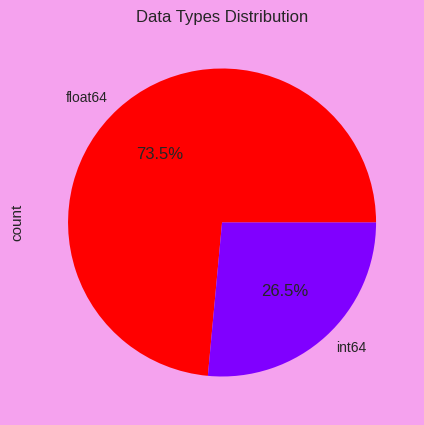

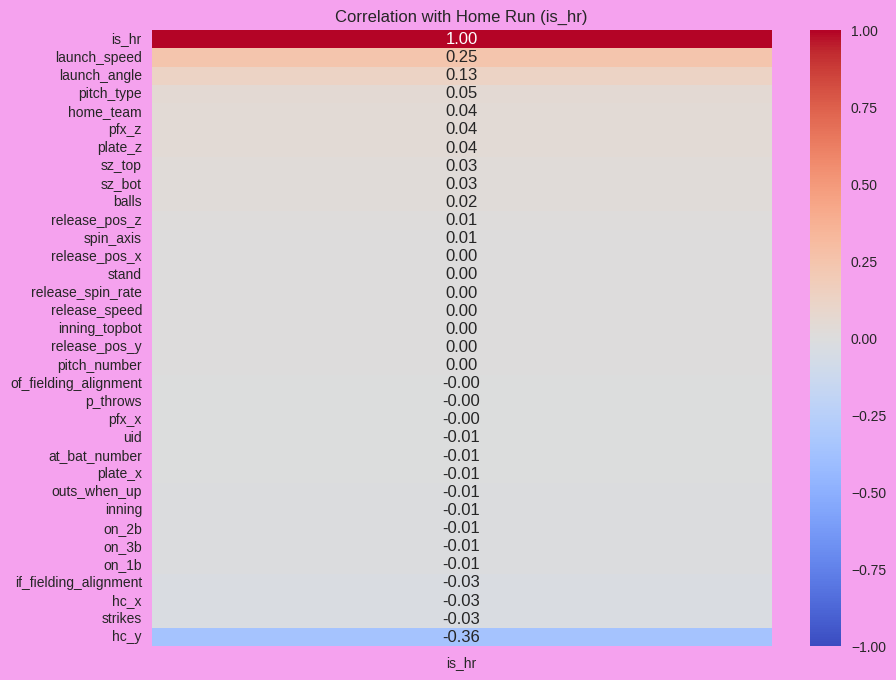

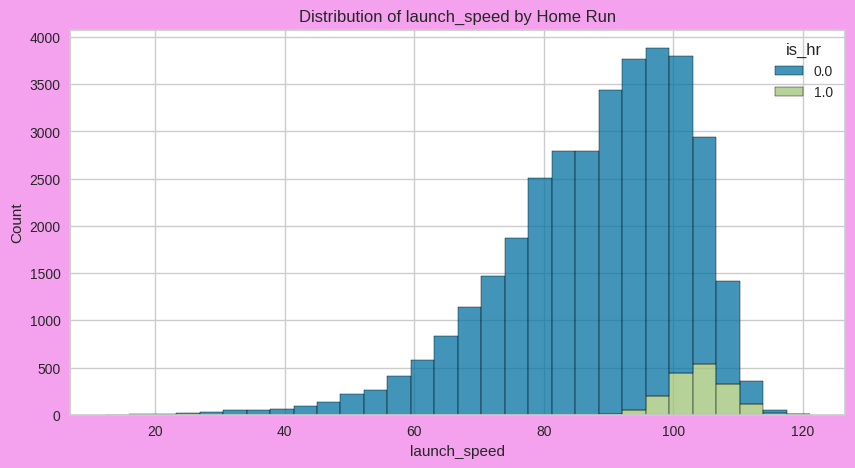

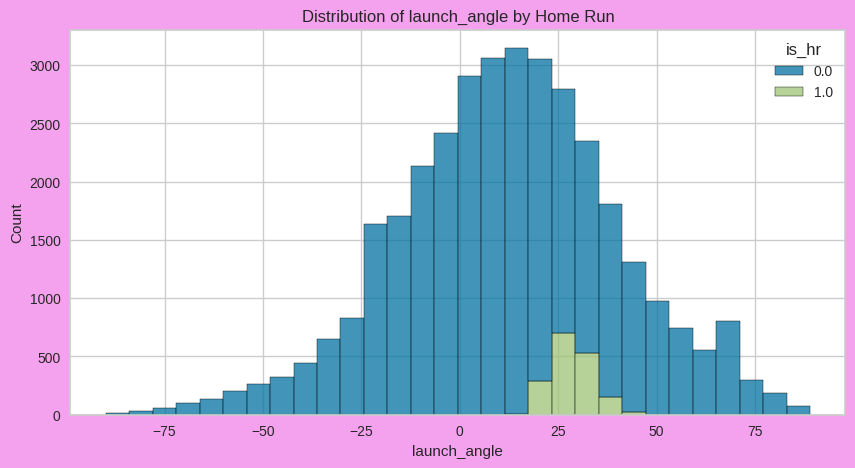

,Description,Value
0,Session id,1921
1,Target,is_hr
2,Target type,Binary
3,Original data shape,"(35000, 34)"
4,Transformed data shape,"(56670, 33)"
5,Transformed train set shape,"(46170, 33)"
6,Transformed test set shape,"(10500, 33)"
7,Ignore features,1
8,Numeric features,32
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9856,0.9949,0.8621,0.8449,0.8530,0.8454,0.8457,0.4790
catboost,CatBoost Classifier,0.9858,0.9959,0.8512,0.8554,0.8530,0.8455,0.8457,8.2230
lightgbm,Light Gradient Boosting Machine,0.9849,0.9954,0.8730,0.8260,0.8484,0.8405,0.8411,0.7680
gbc,Gradient Boosting Classifier,0.9802,0.9940,0.9016,0.7452,0.8159,0.8055,0.8097,9.7940
ada,Ada Boost Classifier,0.9753,0.9911,0.8629,0.6996,0.7724,0.7595,0.7643,1.9450
rf,Random Forest Classifier,0.9767,0.9901,0.7637,0.7594,0.7611,0.7488,0.7491,4.1700
et,Extra Trees Classifier,0.9761,0.9904,0.5930,0.8725,0.7047,0.6928,0.7075,0.9340
dt,Decision Tree Classifier,0.9626,0.8351,0.6939,0.5997,0.6425,0.6230,0.6253,0.7100
qda,Quadratic Discriminant Analysis,0.9338,0.9650,0.8125,0.4090,0.5439,0.5124,0.5478,0.2070
nb,Naive Bayes,0.9136,0.9688,0.9084,0.3502,0.5053,0.4680,0.5326,0.1890


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from pycaret.classification import *
train=train1
test=test1

# Verify train and test columns
print("Train columns:", train.columns.tolist())
print("Test columns:", test.columns.tolist())

# Label encoding for low-cardinality categorical features (CONFIG-3)
categorical_cols = ['stand', 'p_throws', 'inning_topbot', 'if_fielding_alignment', 'of_fielding_alignment']
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]], axis=0).astype(str))
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

# Target encoding for high-cardinality features to avoid feature explosion
te = TargetEncoder(cols=['home_team', 'pitch_type'])
train = te.fit_transform(train, train['is_hr'])
test = te.transform(test)

# Convert boolean columns to int
for col in ['on_3b', 'on_2b', 'on_1b']:
    train[col] = train[col].astype(int)
    test[col] = test[col].astype(int)

# EDA: Data type distribution
plt.figure(figsize=(10, 5), facecolor="#f5a2ee")
train.dtypes.value_counts().plot(kind='pie', cmap="rainbow_r", autopct='%1.1f%%', title="Data Types Distribution")
plt.show()

# EDA: Correlation heatmap for is_hr
plt.figure(figsize=(10, 8), facecolor="#f5a2ee")
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
corr = train[numeric_cols].corr()[['is_hr']].sort_values(by='is_hr', ascending=False)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)
plt.title("Correlation with Home Run (is_hr)")
plt.show()

# EDA: Distribution of key features
for feature in ['launch_speed', 'launch_angle']:
    plt.figure(figsize=(10, 5), facecolor="#f5a2ee")
    sns.histplot(data=train, x=feature, hue='is_hr', multiple='stack', bins=30)
    plt.title(f"Distribution of {feature} by Home Run")
    plt.show()



# PyCaret setup with imbalance handling and minimal outlier removal
clf = setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    outliers_threshold=0.01,
    fix_imbalance=True,
    fix_imbalance_method='smote',
    session_id=1921,
    verbose=True
)

# Compare models by F1 score
compare_models(sort='F1', verbose=True)

SMOTE V/S Without SMOTE

In [33]:
from pycaret.classification import*
clf = setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    outliers_threshold=0.01,
    fix_imbalance=True,
    fix_imbalance_method='smote',
    session_id=1921,
    verbose=True
)
compare_models(
    include=['xgboost', 'lightgbm', 'gbc', 'ada'],
    sort='F1',
    verbose=True
)

,Description,Value
0,Session id,1921
1,Target,is_hr
2,Target type,Binary
3,Original data shape,"(35000, 34)"
4,Transformed data shape,"(56670, 33)"
5,Transformed train set shape,"(46170, 33)"
6,Transformed test set shape,"(10500, 33)"
7,Ignore features,1
8,Numeric features,32
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9856,0.9949,0.8621,0.8449,0.8530,0.8454,0.8457,0.4820
lightgbm,Light Gradient Boosting Machine,0.9849,0.9954,0.8730,0.8260,0.8484,0.8405,0.8411,0.7910
gbc,Gradient Boosting Classifier,0.9802,0.9940,0.9016,0.7452,0.8159,0.8055,0.8097,9.8260
ada,Ada Boost Classifier,0.9753,0.9911,0.8629,0.6996,0.7724,0.7595,0.7643,1.9950


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [34]:
clf = setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    fix_imbalance=True,
    session_id=1921,
    verbose=True
)

best_model = compare_models(
    include=['xgboost', 'lightgbm', 'gbc', 'ada'],
    sort='F1',
    verbose=True
)

,Description,Value
0,Session id,1921
1,Target,is_hr
2,Target type,Binary
3,Original data shape,"(35000, 34)"
4,Transformed data shape,"(54896, 33)"
5,Transformed train set shape,"(44396, 33)"
6,Transformed test set shape,"(10500, 33)"
7,Ignore features,1
8,Numeric features,32
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9849,0.9953,0.8722,0.8264,0.8484,0.8405,0.8410,0.7780
xgboost,Extreme Gradient Boosting,0.9850,0.9952,0.8570,0.8372,0.8468,0.8389,0.8391,0.4650
gbc,Gradient Boosting Classifier,0.9801,0.9940,0.9016,0.7433,0.8147,0.8043,0.8086,9.3700
ada,Ada Boost Classifier,0.9751,0.9909,0.8494,0.7022,0.7685,0.7555,0.7595,1.8820


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

Different configurations for model

Train columns: ['uid', 'home_team', 'sz_top', 'sz_bot', 'pitch_type', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'stand', 'p_throws', 'inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'pitch_number', 'at_bat_number', 'if_fielding_alignment', 'of_fielding_alignment', 'on_3b', 'on_2b', 'on_1b', 'release_speed', 'spin_axis', 'release_spin_rate', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'hc_x', 'hc_y', 'launch_speed', 'launch_angle', 'is_hr']
Test columns: ['uid', 'home_team', 'sz_top', 'sz_bot', 'pitch_type', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'stand', 'p_throws', 'inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'pitch_number', 'at_bat_number', 'if_fielding_alignment', 'of_fielding_alignment', 'on_3b', 'on_2b', 'on_1b', 'release_speed', 'spin_axis', 'release_spin_rate', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'hc_x', 'hc_y', 'launch_speed', 'launch_angle', 'is_hr']
Train shape: (35000, 34)
Test shape: (8000, 34)

Experiment 1: Baseline (No

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.9952,0.8390,0.8609,0.8498,0.8423,0.8424
1,0.9869,0.9949,0.8655,0.8655,0.8655,0.8587,0.8587
2,0.9824,0.9947,0.7815,0.8455,0.8122,0.8030,0.8037
3,0.9849,0.9947,0.8571,0.8361,0.8465,0.8385,0.8386
4,0.9857,0.9933,0.8487,0.8559,0.8523,0.8448,0.8448
5,0.9890,0.9969,0.8655,0.9035,0.8841,0.8783,0.8786
6,0.9878,0.9948,0.8739,0.8739,0.8739,0.8675,0.8675
7,0.9841,0.9945,0.8235,0.8448,0.8340,0.8257,0.8258
8,0.9833,0.9955,0.7899,0.8545,0.8210,0.8122,0.8129


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9840,0.9951,0.8420,0.8005,0.8207,0.8124,0.8126


xgboost - F1: 0.8207, Recall: 0.8420


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9841,0.9955,0.8220,0.8435,0.8326,0.8243,0.8243
1,0.9878,0.9955,0.8571,0.8870,0.8718,0.8654,0.8655
2,0.9837,0.9954,0.7815,0.8692,0.8230,0.8145,0.8157
3,0.9890,0.9955,0.8992,0.8770,0.8880,0.8822,0.8822
4,0.9861,0.9939,0.8739,0.8455,0.8595,0.8522,0.8523
5,0.9886,0.9970,0.8571,0.9027,0.8793,0.8733,0.8736
6,0.9902,0.9965,0.8908,0.9060,0.8983,0.8932,0.8932
7,0.9869,0.9958,0.8319,0.8919,0.8609,0.8540,0.8546
8,0.9845,0.9955,0.7899,0.8785,0.8319,0.8238,0.8250


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9854,0.9952,0.8391,0.8272,0.8331,0.8254,0.8255


lightgbm - F1: 0.8331, Recall: 0.8391

Experiment 2: Class Weights
xgboost - F1: 0.8349, Recall: 0.9080
[LightGBM] [Info] Number of positive: 1698, number of negative: 33302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3894
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048514 -> initscore=-2.976166
[LightGBM] [Info] Start training from score -2.976166
lightgbm - F1: 0.8122, Recall: 0.9569

Experiment 3: SMOTE


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9865,0.9951,0.8729,0.8512,0.8619,0.8548,0.8549
1,0.9869,0.9931,0.8739,0.8595,0.8667,0.8598,0.8598
2,0.9820,0.9949,0.8571,0.7907,0.8226,0.8131,0.8139
3,0.9886,0.9953,0.9076,0.8640,0.8852,0.8792,0.8795
4,0.9853,0.9938,0.8655,0.8374,0.8512,0.8435,0.8436
5,0.9869,0.9962,0.8655,0.8655,0.8655,0.8587,0.8587
6,0.9869,0.9964,0.8908,0.8480,0.8689,0.8620,0.8623
7,0.9853,0.9950,0.8655,0.8374,0.8512,0.8435,0.8436
8,0.9841,0.9949,0.7899,0.8704,0.8282,0.8199,0.8209


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9842,0.9952,0.8420,0.8049,0.8230,0.8148,0.8150


xgboost - F1: 0.8230, Recall: 0.8420


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.9955,0.8644,0.8430,0.8536,0.8460,0.8461
1,0.9878,0.9963,0.8992,0.8560,0.8770,0.8706,0.8709
2,0.9849,0.9951,0.8824,0.8203,0.8502,0.8423,0.8429
3,0.9873,0.9952,0.9076,0.8438,0.8745,0.8678,0.8685
4,0.9845,0.9954,0.8908,0.8092,0.8480,0.8398,0.8409
5,0.9857,0.9960,0.8403,0.8621,0.8511,0.8436,0.8436
6,0.9853,0.9966,0.8824,0.8268,0.8537,0.8459,0.8464
7,0.9845,0.9953,0.8739,0.8189,0.8455,0.8374,0.8379
8,0.9820,0.9951,0.8151,0.8151,0.8151,0.8057,0.8057


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9845,0.9955,0.8736,0.7917,0.8306,0.8225,0.8236


lightgbm - F1: 0.8306, Recall: 0.8736

Experiment 4: SMOTE + Tomek Links


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9934,0.9998,0.9970,0.9898,0.9934,0.9867,0.9867
1,0.9925,0.9997,0.9949,0.9902,0.9925,0.9850,0.9850
2,0.9927,0.9998,0.9966,0.9889,0.9927,0.9854,0.9854
3,0.9942,0.9998,0.9961,0.9923,0.9942,0.9884,0.9884
4,0.9931,0.9998,0.9961,0.9902,0.9932,0.9863,0.9863
5,0.9921,0.9998,0.9974,0.9868,0.9921,0.9841,0.9842
6,0.9925,0.9998,0.9966,0.9885,0.9925,0.9850,0.9850
7,0.9931,0.9998,0.9979,0.9885,0.9932,0.9863,0.9863
8,0.9921,0.9997,0.9948,0.9893,0.9921,0.9841,0.9841


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9830,0.9953,0.8736,0.7677,0.8172,0.8083,0.8102


xgboost - F1: 0.8172, Recall: 0.8736


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9925,0.9998,0.9974,0.9877,0.9925,0.9850,0.9850
1,0.9927,0.9997,0.9953,0.9902,0.9927,0.9854,0.9854
2,0.9918,0.9998,0.9961,0.9877,0.9919,0.9837,0.9837
3,0.9927,0.9998,0.9944,0.9910,0.9927,0.9854,0.9854
4,0.9925,0.9998,0.9970,0.9881,0.9925,0.9850,0.9850
5,0.9918,0.9998,0.9961,0.9877,0.9919,0.9837,0.9837
6,0.9936,0.9998,0.9970,0.9902,0.9936,0.9871,0.9872
7,0.9914,0.9998,0.9970,0.9860,0.9915,0.9828,0.9829
8,0.9906,0.9997,0.9931,0.9880,0.9906,0.9811,0.9811


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9836,0.9957,0.8994,0.7653,0.8269,0.8184,0.8214


lightgbm - F1: 0.8269, Recall: 0.8994

Experiment 5: Regularization
xgboost - F1: 0.8182, Recall: 0.8276
[LightGBM] [Info] Number of positive: 1698, number of negative: 33302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3894
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048514 -> initscore=-2.976166
[LightGBM] [Info] Start training from score -2.976166
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9865,0.9951,0.8729,0.8512,0.8619,0.8548,0.8549
1,0.9869,0.9931,0.8739,0.8595,0.8667,0.8598,0.8598
2,0.9820,0.9949,0.8571,0.7907,0.8226,0.8131,0.8139
3,0.9886,0.9953,0.9076,0.8640,0.8852,0.8792,0.8795
4,0.9853,0.9938,0.8655,0.8374,0.8512,0.8435,0.8436
5,0.9869,0.9962,0.8655,0.8655,0.8655,0.8587,0.8587
6,0.9869,0.9964,0.8908,0.8480,0.8689,0.8620,0.8623
7,0.9853,0.9950,0.8655,0.8374,0.8512,0.8435,0.8436
8,0.9841,0.9949,0.7899,0.8704,0.8282,0.8199,0.8209


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9841,0.9938,0.9153,0.7883,0.8471,0.8387,0.8413
1,0.9833,0.9950,0.9076,0.7826,0.8405,0.8317,0.8342
2,0.9788,0.9935,0.8739,0.7376,0.8000,0.7889,0.7920
3,0.9824,0.9951,0.9160,0.7676,0.8352,0.8261,0.8297
4,0.9800,0.9926,0.8739,0.7536,0.8093,0.7988,0.8013
5,0.9812,0.9949,0.8908,0.7626,0.8217,0.8119,0.8146
6,0.9833,0.9956,0.9244,0.7746,0.8429,0.8341,0.8378
7,0.9820,0.9947,0.8908,0.7737,0.8281,0.8187,0.8210
8,0.9796,0.9940,0.8739,0.7482,0.8062,0.7955,0.7982


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9842,0.9952,0.8420,0.8049,0.8230,0.8148,0.8150


xgboost - F1: 0.8230, Recall: 0.8420


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.9955,0.8644,0.8430,0.8536,0.8460,0.8461
1,0.9878,0.9963,0.8992,0.8560,0.8770,0.8706,0.8709
2,0.9849,0.9951,0.8824,0.8203,0.8502,0.8423,0.8429
3,0.9873,0.9952,0.9076,0.8438,0.8745,0.8678,0.8685
4,0.9845,0.9954,0.8908,0.8092,0.8480,0.8398,0.8409
5,0.9857,0.9960,0.8403,0.8621,0.8511,0.8436,0.8436
6,0.9853,0.9966,0.8824,0.8268,0.8537,0.8459,0.8464
7,0.9845,0.9953,0.8739,0.8189,0.8455,0.8374,0.8379
8,0.9820,0.9951,0.8151,0.8151,0.8151,0.8057,0.8057


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9829,0.9955,0.8559,0.8016,0.8279,0.8189,0.8193
1,0.9878,0.9955,0.9076,0.8504,0.8780,0.8716,0.8721
2,0.9824,0.9952,0.8739,0.7879,0.8287,0.8195,0.8207
3,0.9873,0.9964,0.8824,0.8607,0.8714,0.8647,0.8648
4,0.9837,0.9946,0.8739,0.8062,0.8387,0.8301,0.8309
5,0.9853,0.9956,0.8655,0.8374,0.8512,0.8435,0.8436
6,0.9857,0.9962,0.8824,0.8333,0.8571,0.8496,0.8500
7,0.9829,0.9949,0.8403,0.8130,0.8264,0.8174,0.8176
8,0.9808,0.9954,0.8319,0.7857,0.8082,0.7981,0.7984


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9845,0.9955,0.8736,0.7917,0.8306,0.8225,0.8236


lightgbm - F1: 0.8306, Recall: 0.8736

Experiment 7: Feature Selection


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9865,0.9951,0.8729,0.8512,0.8619,0.8548,0.8549
1,0.9869,0.9931,0.8739,0.8595,0.8667,0.8598,0.8598
2,0.9820,0.9949,0.8571,0.7907,0.8226,0.8131,0.8139
3,0.9886,0.9953,0.9076,0.8640,0.8852,0.8792,0.8795
4,0.9853,0.9938,0.8655,0.8374,0.8512,0.8435,0.8436
5,0.9869,0.9962,0.8655,0.8655,0.8655,0.8587,0.8587
6,0.9869,0.9964,0.8908,0.8480,0.8689,0.8620,0.8623
7,0.9853,0.9950,0.8655,0.8374,0.8512,0.8435,0.8436
8,0.9841,0.9949,0.7899,0.8704,0.8282,0.8199,0.8209


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9502,0.5782,0.0000,0.0000,0.0000,-0.0032,-0.0091
1,0.9502,0.5596,0.0000,0.0000,0.0000,-0.0024,-0.0079
2,0.9506,0.5661,0.0000,0.0000,0.0000,-0.0016,-0.0065
3,0.9506,0.5941,0.0000,0.0000,0.0000,-0.0016,-0.0065
4,0.9506,0.5754,0.0000,0.0000,0.0000,-0.0016,-0.0065
5,0.9502,0.5592,0.0000,0.0000,0.0000,-0.0024,-0.0079
6,0.9514,0.5862,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9510,0.5453,0.0084,0.3333,0.0164,0.0140,0.0464
8,0.9510,0.5248,0.0000,0.0000,0.0000,-0.0008,-0.0046


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9556,0.5477,0.0029,0.1111,0.0056,0.0034,0.0111


xgboost - F1: 0.0056, Recall: 0.0029


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9518,0.5971,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9506,0.5733,0.0000,0.0000,0.0000,-0.0016,-0.0065
2,0.9514,0.5767,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9510,0.5668,0.0000,0.0000,0.0000,-0.0008,-0.0046
4,0.9510,0.5691,0.0000,0.0000,0.0000,-0.0008,-0.0046
5,0.9498,0.5992,0.0000,0.0000,0.0000,-0.0032,-0.0091
6,0.9514,0.5959,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9506,0.5853,0.0000,0.0000,0.0000,-0.0016,-0.0065
8,0.9510,0.5213,0.0000,0.0000,0.0000,-0.0008,-0.0046


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9518,0.5971,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9506,0.5733,0.0000,0.0000,0.0000,-0.0016,-0.0065
2,0.9514,0.5767,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9510,0.5668,0.0000,0.0000,0.0000,-0.0008,-0.0046
4,0.9510,0.5691,0.0000,0.0000,0.0000,-0.0008,-0.0046
5,0.9498,0.5992,0.0000,0.0000,0.0000,-0.0032,-0.0091
6,0.9514,0.5959,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9506,0.5853,0.0000,0.0000,0.0000,-0.0016,-0.0065
8,0.9510,0.5213,0.0000,0.0000,0.0000,-0.0008,-0.0046


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9565,0.5875,0.0000,0.0000,0.0000,0.0000,0.0000


lightgbm - F1: 0.0000, Recall: 0.0000

Summary of Results:
           Experiment     Model        F1    Recall
0            Baseline   xgboost  0.820728  0.841954
1            Baseline  lightgbm  0.833096  0.839080
2       Class Weights   xgboost  0.834875  0.908046
3       Class Weights  lightgbm  0.812195  0.956897
4               SMOTE   xgboost  0.823034  0.841954
5               SMOTE  lightgbm  0.830601  0.873563
6         SMOTE+Tomek   xgboost  0.817204  0.873563
7         SMOTE+Tomek  lightgbm  0.826948  0.899425
8      Regularization   xgboost  0.818182  0.827586
9      Regularization  lightgbm  0.834043  0.844828
10             Tuning   xgboost  0.823034  0.841954
11             Tuning  lightgbm  0.830601  0.873563
12  Feature Selection   xgboost  0.005602  0.002874
13  Feature Selection  lightgbm  0.000000  0.000000


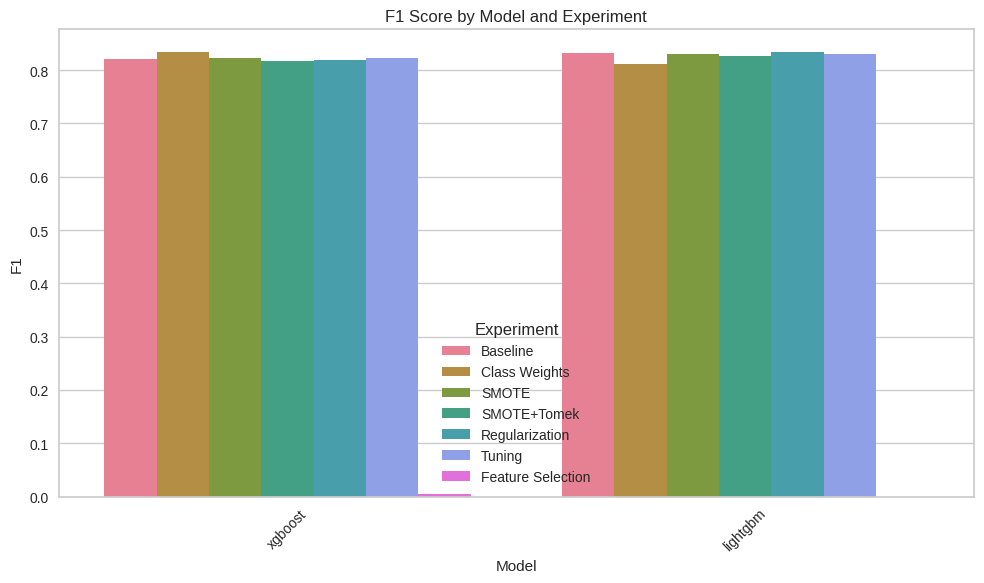

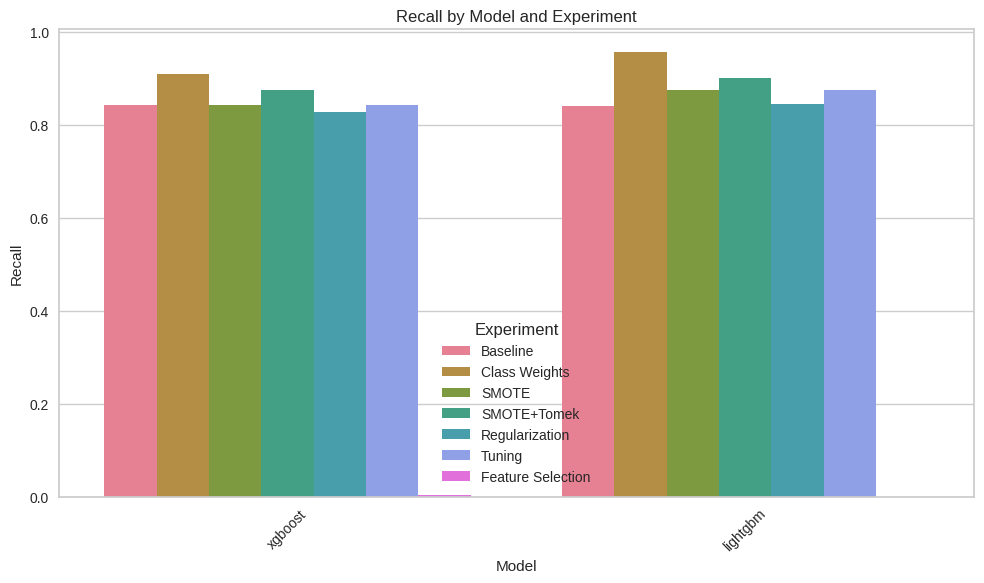


Best Model: xgboost from Class Weights with F1: 0.8349


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from pycaret.classification import *
from sklearn.metrics import f1_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

# Verify train and test DataFrames
print("Train columns:", train.columns.tolist())
print("Test columns:", test.columns.tolist())
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Preprocessing
def preprocess_data(train, test):
    print("Applying preprocessing...")
    # Label encoding for low-cardinality categorical features
    categorical_cols = ['stand', 'p_throws', 'inning_topbot', 'if_fielding_alignment', 'of_fielding_alignment']
    for col in categorical_cols:
        le = LabelEncoder()
        le.fit(pd.concat([train[col], test[col]], axis=0).astype(str))
        train[col] = le.transform(train[col].astype(str))
        test[col] = le.transform(test[col].astype(str))

    # Target encoding for high-cardinality features
    te = TargetEncoder(cols=['home_team', 'pitch_type'])
    train = te.fit_transform(train, train['is_hr'])
    test = te.transform(test)

    # Convert boolean columns to int
    for col in ['on_3b', 'on_2b', 'on_1b']:
        train[col] = train[col].astype(int)
        test[col] = test[col].astype(int)

    return train, test

# Apply preprocessing (uncomment if your data isn't preprocessed)
# train, test = preprocess_data(train, test)

# Initialize results list
results = []

# Experiment 1: Baseline (No Imbalance Handling)
print("\nExperiment 1: Baseline (No Imbalance Handling)")
clf1 = setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    outliers_threshold=0.01,
    fix_imbalance=False,
    session_id=1921,
    verbose=False
)
for model_name in ['xgboost', 'lightgbm']:
    try:
        model = create_model(model_name)
        pred_df = predict_model(model, data=test)
        y_pred = pred_df['prediction_label']  # Updated to use 'prediction_label'
        f1 = f1_score(test['is_hr'], y_pred)
        recall = recall_score(test['is_hr'], y_pred)
        results.append({'Experiment': 'Baseline', 'Model': model_name, 'F1': f1, 'Recall': recall})
        print(f"{model_name} - F1: {f1:.4f}, Recall: {recall:.4f}")
    except Exception as e:
        print(f"Error in {model_name}: {str(e)}")

# Experiment 2: Class Weights
print("\nExperiment 2: Class Weights")
pos_weight = sum(train['is_hr'] == 0) / sum(train['is_hr'] == 1)  # Ratio of negative to positive
clf2 = setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    outliers_threshold=0.01,
    fix_imbalance=False,
    session_id=1921,
    verbose=False
)
models = {
    'xgboost': XGBClassifier(scale_pos_weight=pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=1921),
    'lightgbm': LGBMClassifier(scale_pos_weight=pos_weight, random_state=1921)
}
for model_name, model in models.items():
    try:
        model.fit(train.drop(['is_hr', 'uid'], axis=1), train['is_hr'])
        y_pred = model.predict(test.drop(['is_hr', 'uid'], axis=1))
        f1 = f1_score(test['is_hr'], y_pred)
        recall = recall_score(test['is_hr'], y_pred)
        results.append({'Experiment': 'Class Weights', 'Model': model_name, 'F1': f1, 'Recall': recall})
        print(f"{model_name} - F1: {f1:.4f}, Recall: {recall:.4f}")
    except Exception as e:
        print(f"Error in {model_name}: {str(e)}")

# Experiment 3: SMOTE
print("\nExperiment 3: SMOTE")
clf3 = setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    outliers_threshold=0.01,
    fix_imbalance=True,
    fix_imbalance_method='smote',
    session_id=1921,
    verbose=False
)
for model_name in ['xgboost', 'lightgbm']:
    try:
        model = create_model(model_name)
        pred_df = predict_model(model, data=test)
        y_pred = pred_df['prediction_label']  # Updated to use 'prediction_label'
        f1 = f1_score(test['is_hr'], y_pred)
        recall = recall_score(test['is_hr'], y_pred)
        results.append({'Experiment': 'SMOTE', 'Model': model_name, 'F1': f1, 'Recall': recall})
        print(f"{model_name} - F1: {f1:.4f}, Recall: {recall:.4f}")
    except Exception as e:
        print(f"Error in {model_name}: {str(e)}")

# Experiment 4: SMOTE + Tomek Links
print("\nExperiment 4: SMOTE + Tomek Links")
smotetomek = SMOTETomek(random_state=1921)
X_train, y_train = smotetomek.fit_resample(train.drop(['is_hr', 'uid'], axis=1), train['is_hr'])
train_balanced = pd.concat([X_train, y_train], axis=1)
clf4 = setup(
    data=train_balanced,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    outliers_threshold=0.01,
    fix_imbalance=False,
    session_id=1921,
    verbose=False
)
for model_name in ['xgboost', 'lightgbm']:
    try:
        model = create_model(model_name)
        pred_df = predict_model(model, data=test)
        y_pred = pred_df['prediction_label']  # Updated to use 'prediction_label'
        f1 = f1_score(test['is_hr'], y_pred)
        recall = recall_score(test['is_hr'], y_pred)
        results.append({'Experiment': 'SMOTE+Tomek', 'Model': model_name, 'F1': f1, 'Recall': recall})
        print(f"{model_name} - F1: {f1:.4f}, Recall: {recall:.4f}")
    except Exception as e:
        print(f"Error in {model_name}: {str(e)}")

# Experiment 5: Regularization
print("\nExperiment 5: Regularization")
clf5 = setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    outliers_threshold=0.01,
    fix_imbalance=True,
    session_id=1921,
    verbose=False
)
models_reg = {
    'xgboost': XGBClassifier(alpha=1.0, lambda_=1.0, max_depth=5, use_label_encoder=False, eval_metric='logloss', random_state=1921),
    'lightgbm': LGBMClassifier(reg_alpha=1.0, reg_lambda=1.0, max_depth=5, random_state=1921)
}
for model_name, model in models_reg.items():
    try:
        model.fit(train.drop(['is_hr', 'uid'], axis=1), train['is_hr'])
        y_pred = model.predict(test.drop(['is_hr', 'uid'], axis=1))
        f1 = f1_score(test['is_hr'], y_pred)
        recall = recall_score(test['is_hr'], y_pred)
        results.append({'Experiment': 'Regularization', 'Model': model_name, 'F1': f1, 'Recall': recall})
        print(f"{model_name} - F1: {f1:.4f}, Recall: {recall:.4f}")
    except Exception as e:
        print(f"Error in {model_name}: {str(e)}")

# Experiment 6: Hyperparameter Tuning
print("\nExperiment 6: Hyperparameter Tuning")
clf6 = setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    outliers_threshold=0.01,
    fix_imbalance=True,
    session_id=1921,
    verbose=False
)
for model_name in ['xgboost', 'lightgbm']:
    try:
        model = create_model(model_name)
        tuned_model = tune_model(model, optimize='F1', n_iter=10, search_library='scikit-optimize')
        pred_df = predict_model(tuned_model, data=test)
        y_pred = pred_df['prediction_label']  # Updated to use 'prediction_label'
        f1 = f1_score(test['is_hr'], y_pred)
        recall = recall_score(test['is_hr'], y_pred)
        results.append({'Experiment': 'Tuning', 'Model': model_name, 'F1': f1, 'Recall': recall})
        print(f"{model_name} - F1: {f1:.4f}, Recall: {recall:.4f}")
    except Exception as e:
        print(f"Error in {model_name}: {str(e)}")

# Experiment 7: Feature Selection
print("\nExperiment 7: Feature Selection")
clf7 = setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    outliers_threshold=0.01,
    fix_imbalance=True,
    session_id=1921,
    verbose=False
)
for model_name in ['xgboost', 'lightgbm']:
    try:
        model = create_model(model_name)
        # Generate feature importance plot
        plot_model(model, plot='feature', save=True)
        # Select top 15 features (adjust based on importance plot)
        top_features = get_config('X_train').columns[:15]
        train_selected = train[list(top_features) + ['is_hr']]
        test_selected = test[list(top_features) + ['is_hr']]
        clf7_selected = setup(
            data=train_selected,
            target='is_hr',
            normalize=True,
            normalize_method='robust',
            remove_outliers=True,
            outliers_threshold=0.01,
            fix_imbalance=True,
            session_id=1921,
            verbose=False
        )
        model_selected = create_model(model_name)
        pred_df = predict_model(model_selected, data=test_selected)
        y_pred = pred_df['prediction_label']  # Updated to use 'prediction_label'
        f1 = f1_score(test_selected['is_hr'], y_pred)
        recall = recall_score(test_selected['is_hr'], y_pred)
        results.append({'Experiment': 'Feature Selection', 'Model': model_name, 'F1': f1, 'Recall': recall})
        print(f"{model_name} - F1: {f1:.4f}, Recall: {recall:.4f}")
    except Exception as e:
        print(f"Error in {model_name}: {str(e)}")

# Summarize and visualize results
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)

# Bar plot for F1 scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1', hue='Experiment', data=results_df)
plt.title('F1 Score by Model and Experiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for Recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', hue='Experiment', data=results_df)
plt.title('Recall by Model and Experiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save the best model
best_result = results_df.loc[results_df['F1'].idxmax()]
best_model_name = best_result['Model']
best_experiment = best_result['Experiment']
print(f"\nBest Model: {best_model_name} from {best_experiment} with F1: {best_result['F1']:.4f}")
clf_final = setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    outliers_threshold=0.01,
    fix_imbalance=(best_experiment in ['SMOTE', 'SMOTE+Tomek']),
    session_id=1921,
    verbose=False
)
# final_model = create_model(best_model_name)
# save_model(final_model, 'best_home_run_model')

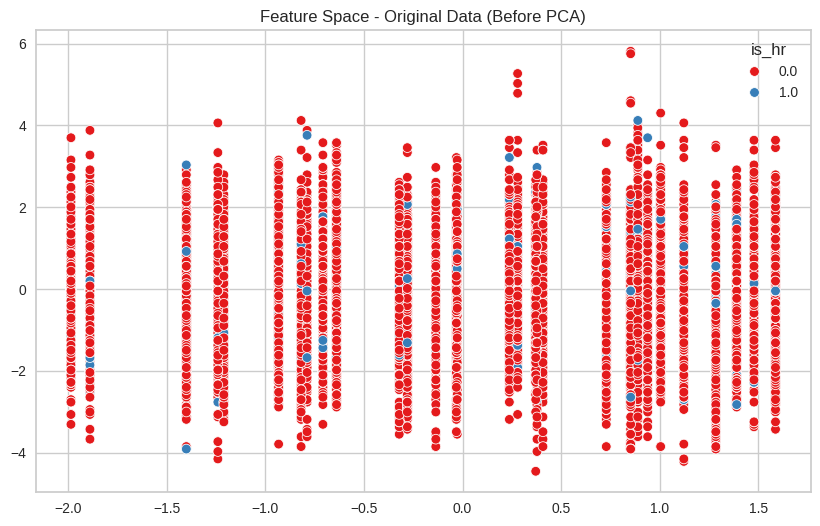

In [36]:
from pycaret.classification import *

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# train=train1
# test=test1
# Step 1: Visualize Original Feature Space (Before PCA)
# Assuming `train` is your original dataset
X = train.drop(columns=["is_hr", "uid"])  # Drop target and non-numeric columns
y = train["is_hr"]  # Target variable

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a scatter plot for original data (First two features for simplicity)
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='Set1')
plt.title("Feature Space - Original Data (Before PCA)")
plt.show()


# ------------------------------
# Uncomment this block for **no PCA** setup
# ------------------------------
# setup(train, target="is_hr", ignore_features="uid",
#       normalize_method="robust", remove_outliers=True)  # No PCA


,Description,Value
0,Session id,2338
1,Target,is_hr
2,Target type,Binary
3,Original data shape,"(35000, 34)"
4,Transformed data shape,"(33775, 6)"
5,Transformed train set shape,"(23275, 6)"
6,Transformed test set shape,"(10500, 6)"
7,Ignore features,3
8,Numeric features,32
9,Preprocess,True


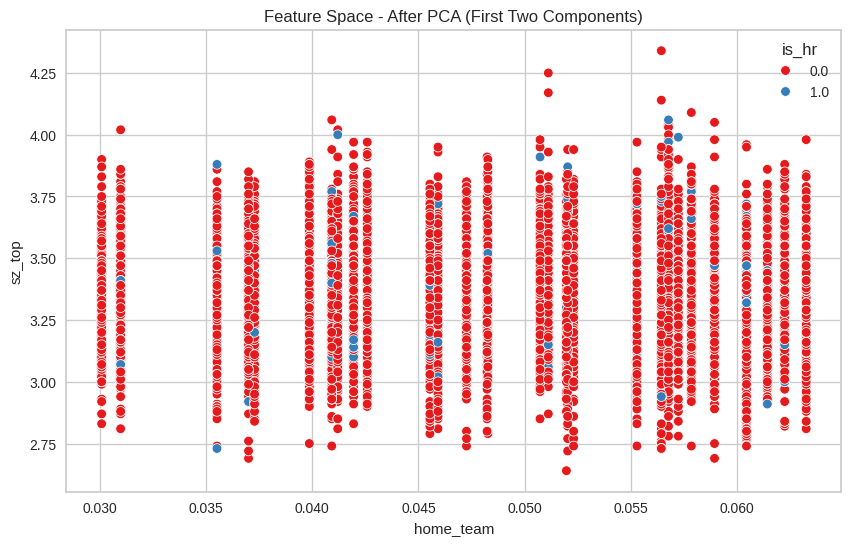

In [37]:
# ------------------------------
# Uncomment this block for **PCA** setup
# ------------------------------

# Step 1: Apply PCA during setup
setup(train, target="is_hr", ignore_features="uid",
      normalize_method="robust", remove_outliers=True,
      pca=True, pca_components=0.99)  # Enable PCA for dimensionality reduction

# Step 2: Retrieve the transformed data after PCA
X_transformed = get_config('X_train')  # This gives the PCA-transformed dataset

# Step 3: Plot the first two PCA components
# Use iloc to select columns correctly
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_transformed.iloc[:, 0], y=X_transformed.iloc[:, 1], hue=train['is_hr'], palette='Set1')
plt.title("Feature Space - After PCA (First Two Components)")
plt.show()

In [38]:


# ------------------------------
# Experiment 1: Ridge Classifier with Class Weights
# ------------------------------
print("---- Experiment 1: Ridge Classifier with Class Weights ----")
ridge_model = create_model('ridge', class_weight='balanced')  # Ridge with balanced class weights
tuned_ridge = tune_model(ridge_model)
print(tuned_ridge)
print("\n" + "-"*80)  # Separator for readability

# ------------------------------
# Experiment 2: Logistic Regression with Class Weights
# ------------------------------
print("---- Experiment 2: Logistic Regression with Class Weights ----")
lr_model = create_model('lr', class_weight='balanced')  # Logistic Regression with balanced class weights
tuned_lr = tune_model(lr_model)
print(tuned_lr)
print("\n" + "-"*80)  # Separator for readability

# ------------------------------
# Experiment 3: XGBoost Classifier with Class Weights
# ------------------------------
print("---- Experiment 4: XGBoost Classifier with Class Weights ----")
xgboost_model = create_model('xgboost', class_weight='balanced')  # XGBoost with balanced class weights
tuned_xgboost = tune_model(xgboost_model)
print(tuned_xgboost)
print("\n" + "-"*80)  # Separator for readability



---- Experiment 1: Ridge Classifier with Class Weights ----


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7849,0.9191,0.9328,0.1762,0.2964,0.2338,0.3493
1,0.7931,0.9400,0.9580,0.1851,0.3102,0.2491,0.3680
2,0.8151,0.9472,0.9664,0.2039,0.3367,0.2789,0.3951
3,0.8029,0.9472,0.9580,0.1926,0.3207,0.2609,0.3781
4,0.8033,0.9446,0.9664,0.1939,0.3230,0.2634,0.3821
5,0.8135,0.9485,0.9832,0.2045,0.3386,0.2808,0.4004
6,0.7812,0.9352,0.9412,0.1747,0.2947,0.2318,0.3493
7,0.7935,0.9358,0.9412,0.1833,0.3068,0.2455,0.3613
8,0.7992,0.9385,0.9412,0.1876,0.3128,0.2523,0.3671


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7849,0.9191,0.9328,0.1762,0.2964,0.2338,0.3493
1,0.7931,0.9400,0.9580,0.1851,0.3102,0.2491,0.3680
2,0.8151,0.9472,0.9664,0.2039,0.3367,0.2789,0.3951
3,0.8029,0.9472,0.9580,0.1926,0.3207,0.2609,0.3781
4,0.8033,0.9446,0.9664,0.1939,0.3230,0.2634,0.3821
5,0.8135,0.9485,0.9832,0.2045,0.3386,0.2808,0.4004
6,0.7812,0.9352,0.9412,0.1747,0.2947,0.2318,0.3493
7,0.7935,0.9358,0.9412,0.1833,0.3068,0.2455,0.3613
8,0.7992,0.9385,0.9412,0.1876,0.3128,0.2523,0.3671


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
RidgeClassifier(alpha=1.0, class_weight='balanced', copy_X=True,
                fit_intercept=True, max_iter=None, positive=False,
                random_state=2338, solver='auto', tol=0.0001)

--------------------------------------------------------------------------------
---- Experiment 2: Logistic Regression with Class Weights ----


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8380,0.9227,0.8403,0.2092,0.3350,0.2789,0.3679
1,0.8441,0.9387,0.8992,0.2243,0.3591,0.3050,0.4020
2,0.8690,0.9486,0.9076,0.2584,0.4022,0.3533,0.4426
3,0.8527,0.9488,0.9244,0.2381,0.3787,0.3266,0.4250
4,0.8527,0.9465,0.8739,0.2311,0.3656,0.3128,0.4028
5,0.8588,0.9497,0.9244,0.2461,0.3887,0.3379,0.4340
6,0.8286,0.9374,0.9412,0.2133,0.3478,0.2917,0.4003
7,0.8429,0.9379,0.8908,0.2218,0.3551,0.3007,0.3966
8,0.8396,0.9386,0.8824,0.2169,0.3483,0.2931,0.3886


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9592,0.9216,0.2353,0.7568,0.3590,0.3439,0.4079
1,0.9592,0.9392,0.2689,0.7111,0.3902,0.3735,0.4216
2,0.9580,0.9479,0.2605,0.6739,0.3758,0.3584,0.4024
3,0.9604,0.9488,0.2605,0.7750,0.3899,0.3747,0.4353
4,0.9600,0.9475,0.3025,0.7059,0.4235,0.4062,0.4458
5,0.9559,0.9506,0.2437,0.6170,0.3494,0.3310,0.3698
6,0.9543,0.9374,0.2101,0.5814,0.3086,0.2903,0.3313
7,0.9588,0.9379,0.2773,0.6875,0.3952,0.3778,0.4202
8,0.9604,0.9385,0.3109,0.7115,0.4327,0.4155,0.4541


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


LogisticRegression(C=9.668, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2338, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------------------------------------------------------------
---- Experiment 4: XGBoost Classifier with Class Weights ----


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9804,0.9920,0.7983,0.7983,0.7983,0.7880,0.7880
1,0.9820,0.9925,0.7563,0.8571,0.8036,0.7942,0.7959
2,0.9824,0.9914,0.7899,0.8393,0.8139,0.8047,0.8051
3,0.9792,0.9923,0.7647,0.7982,0.7811,0.7702,0.7704
4,0.9829,0.9934,0.8235,0.8235,0.8235,0.8145,0.8145
5,0.9820,0.9947,0.8487,0.7953,0.8211,0.8117,0.8122
6,0.9784,0.9927,0.8151,0.7578,0.7854,0.7741,0.7746
7,0.9751,0.9888,0.7395,0.7458,0.7426,0.7295,0.7295
8,0.9845,0.9912,0.8151,0.8584,0.8362,0.8281,0.8284


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9804,0.9917,0.8655,0.7630,0.8110,0.8007,0.8025
1,0.9816,0.9922,0.8067,0.8136,0.8101,0.8005,0.8005
2,0.9808,0.9922,0.8319,0.7857,0.8082,0.7981,0.7984
3,0.9812,0.9933,0.8403,0.7874,0.8130,0.8031,0.8036
4,0.9788,0.9937,0.8151,0.7638,0.7886,0.7775,0.7779
5,0.9829,0.9950,0.8739,0.7939,0.8320,0.8230,0.8240
6,0.9808,0.9937,0.8824,0.7609,0.8171,0.8071,0.8095
7,0.9747,0.9899,0.7899,0.7176,0.7520,0.7387,0.7396
8,0.9849,0.9925,0.8908,0.8154,0.8514,0.8435,0.8444


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device='cpu',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1, ...)

--------------------------------------------------------------------------------


In [39]:
cols_to_remove = ['hc_x', 'hc_y', 'launch_speed', 'launch_angle']
setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'] + cols_to_remove,
    fix_imbalance=True,  # Enable SMOTE
    remove_multicollinearity=True,
    feature_selection=True,
    normalize=True,
    session_id=42
)

models()
compare_models()

[LightGBM] [Info] Number of positive: 23311, number of negative: 23311
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6884
[LightGBM] [Info] Number of data points in the train set: 46622, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Description,Value
0,Session id,42
1,Target,is_hr
2,Target type,Binary
3,Original data shape,"(35000, 34)"
4,Transformed data shape,"(57122, 6)"
5,Transformed train set shape,"(46622, 6)"
6,Transformed test set shape,"(10500, 6)"
7,Ignore features,5
8,Numeric features,28
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9515,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6010
gbc,Gradient Boosting Classifier,0.9510,0.6205,0.0000,0.0000,0.0000,-0.0009,-0.0028,2.4250
ada,Ada Boost Classifier,0.9500,0.6109,0.0042,0.0111,0.0061,0.0035,0.0040,0.9890
lightgbm,Light Gradient Boosting Machine,0.9492,0.6136,0.0042,0.0161,0.0067,0.0022,0.0008,0.8240
catboost,CatBoost Classifier,0.9490,0.5999,0.0017,0.0080,0.0028,-0.0019,-0.0042,6.7610
xgboost,Extreme Gradient Boosting,0.9441,0.5962,0.0050,0.0146,0.0069,-0.0049,-0.0083,0.6540
rf,Random Forest Classifier,0.9404,0.5834,0.0261,0.0959,0.0397,0.0195,0.0245,2.1370
et,Extra Trees Classifier,0.9385,0.5915,0.0303,0.0890,0.0442,0.0212,0.0245,1.2730
dt,Decision Tree Classifier,0.8824,0.5040,0.0849,0.0528,0.0648,0.0057,0.0061,0.6530
knn,K Neighbors Classifier,0.8004,0.5441,0.2043,0.0575,0.0891,0.0152,0.0196,0.7380


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=42, strategy='prior')

## Final Model and Training

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from pycaret.classification import *
train=train1
test=test1

# Verify train and test columns
print("Train columns:", train.columns.tolist())
print("Test columns:", test.columns.tolist())

# Label encoding for low-cardinality categorical features (CONFIG-3)
categorical_cols = ['stand', 'p_throws', 'inning_topbot', 'if_fielding_alignment', 'of_fielding_alignment']
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]], axis=0).astype(str))
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

# Target encoding for high-cardinality features to avoid feature explosion
te = TargetEncoder(cols=['home_team', 'pitch_type'])
train = te.fit_transform(train, train['is_hr'])
test = te.transform(test)

# Convert boolean columns to int
for col in ['on_3b', 'on_2b', 'on_1b']:
    train[col] = train[col].astype(int)
    test[col] = test[col].astype(int)


Train columns: ['uid', 'home_team', 'sz_top', 'sz_bot', 'pitch_type', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'stand', 'p_throws', 'inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'pitch_number', 'at_bat_number', 'if_fielding_alignment', 'of_fielding_alignment', 'on_3b', 'on_2b', 'on_1b', 'release_speed', 'spin_axis', 'release_spin_rate', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'hc_x', 'hc_y', 'launch_speed', 'launch_angle', 'is_hr']
Test columns: ['uid', 'home_team', 'sz_top', 'sz_bot', 'pitch_type', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'stand', 'p_throws', 'inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'pitch_number', 'at_bat_number', 'if_fielding_alignment', 'of_fielding_alignment', 'on_3b', 'on_2b', 'on_1b', 'release_speed', 'spin_axis', 'release_spin_rate', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'hc_x', 'hc_y', 'launch_speed', 'launch_angle', 'is_hr']


In [ ]:
import joblib

# Save the fitted target encoder
joblib.dump(te, 'target_encoder.pkl')


<Axes: >

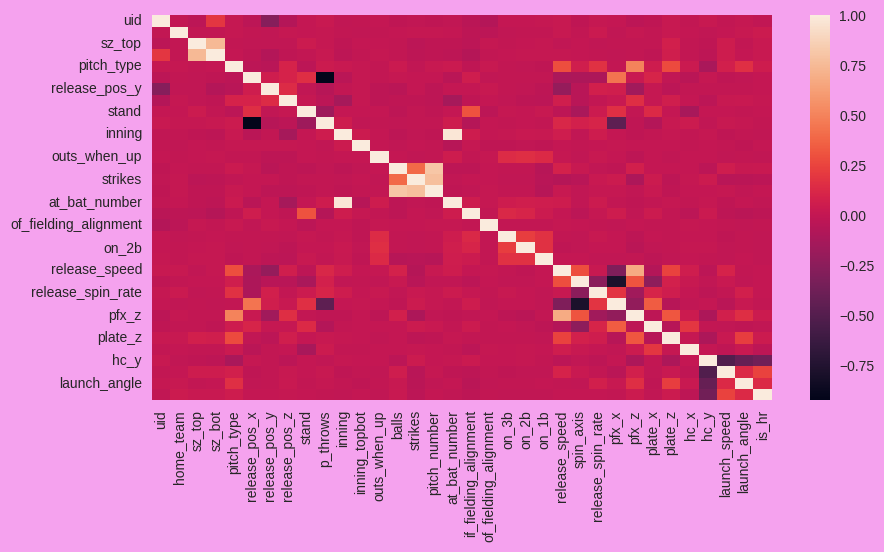

In [41]:
plt.figure(facecolor="#f5a2ee",figsize=(10,5))
sns.heatmap(train.corr(),annot=False)

In [42]:
from pycaret.classification import *
import os
import warnings
warnings.filterwarnings('ignore')

clf = setup(
    data=train,
    target='is_hr',
    ignore_features=['uid'],
    normalize=True,
    normalize_method='robust',
    remove_outliers=True,
    outliers_threshold=0.01,
    fold=10,  # 10-fold cross-validation
    session_id=1921,
    verbose=True
)

# Create XGBoost model
xgb_model = create_model('xgboost', fold=10)

# Tune XGBoost model with early stopping (PyCaret >= 3.0.0)
tuned_xgb = tune_model(
    xgb_model,
    optimize='F1',
    fold=10,
    n_iter=25,
    early_stopping=True,
    early_stopping_max_iters=10,  # early_stopping_rounds
    choose_better=True
)

,Description,Value
0,Session id,1921
1,Target,is_hr
2,Target type,Binary
3,Original data shape,"(35000, 34)"
4,Transformed data shape,"(34755, 33)"
5,Transformed train set shape,"(24255, 33)"
6,Transformed test set shape,"(10500, 33)"
7,Ignore features,1
8,Numeric features,32
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.9952,0.8390,0.8609,0.8498,0.8423,0.8424
1,0.9869,0.9949,0.8655,0.8655,0.8655,0.8587,0.8587
2,0.9824,0.9947,0.7815,0.8455,0.8122,0.8030,0.8037
3,0.9849,0.9947,0.8571,0.8361,0.8465,0.8385,0.8386
4,0.9857,0.9933,0.8487,0.8559,0.8523,0.8448,0.8448
5,0.9890,0.9969,0.8655,0.9035,0.8841,0.8783,0.8786
6,0.9878,0.9948,0.8739,0.8739,0.8739,0.8675,0.8675
7,0.9841,0.9945,0.8235,0.8448,0.8340,0.8257,0.8258
8,0.9833,0.9955,0.7899,0.8545,0.8210,0.8122,0.8129


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9808,0.9962,0.9407,0.7351,0.8253,0.8153,0.8222
1,0.9833,0.9952,0.9412,0.7671,0.8453,0.8365,0.8414
2,0.9759,0.9951,0.9160,0.6899,0.7870,0.7745,0.7833
3,0.9841,0.9965,0.9496,0.7740,0.8528,0.8445,0.8494
4,0.9808,0.9944,0.9244,0.7432,0.8240,0.8140,0.8194
5,0.9873,0.9975,0.9496,0.8188,0.8794,0.8727,0.8754
6,0.9829,0.9961,0.9664,0.7516,0.8456,0.8367,0.8441
7,0.9816,0.9956,0.9496,0.7434,0.8339,0.8244,0.8313
8,0.9837,0.9956,0.9412,0.7724,0.8485,0.8399,0.8445


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 25 candidates, totalling 250 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [51]:
# Evaluate on test set
preds = predict_model(tuned_xgb, data=test)
print(preds[['is_hr', 'prediction_label', 'prediction_score']].head())

# Save the best model to BASE_DIR
model_save_path = os.path.join(BASE_DIR, "no_SMOTE_model_optimal_weights")
save_model(tuned_xgb, model_save_path)
print(f"Model saved to {model_save_path}.pkl")
best = tuned_xgb

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9840,0.9951,0.8420,0.8005,0.8207,0.8124,0.8126


   is_hr  prediction_label  prediction_score
0    0.0                 0            1.0000
1    0.0                 0            1.0000
2    0.0                 0            1.0000
3    0.0                 0            0.9972
4    0.0                 0            0.9999
Transformation Pipeline and Model Successfully Saved
Model saved to /content/no_SMOTE_model_optimal_weights.pkl


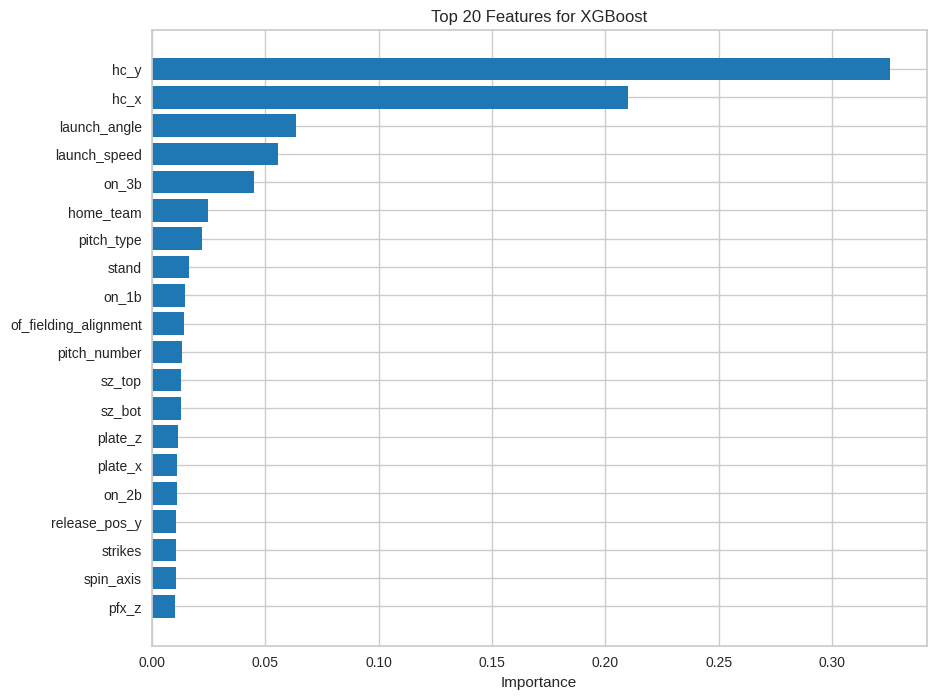

In [54]:
from pycaret.classification import plot_model
import matplotlib.pyplot as plt

# --- OR: Custom Plot for Top 20 Features ---
# Extract feature importance
importance = best.feature_importances_
features = best.get_booster().feature_names

# Sort and select top 20
sorted_idx = importance.argsort()[-20:][::-1]  # Get top 20 indices
top_features = [features[i] for i in sorted_idx]
top_importance = importance[sorted_idx]

# Plot manually
plt.figure(figsize=(10, 8))
plt.barh(top_features, top_importance, color='#1f77b4')
plt.xlabel('Importance')
plt.title('Top 20 Features for XGBoost')
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()

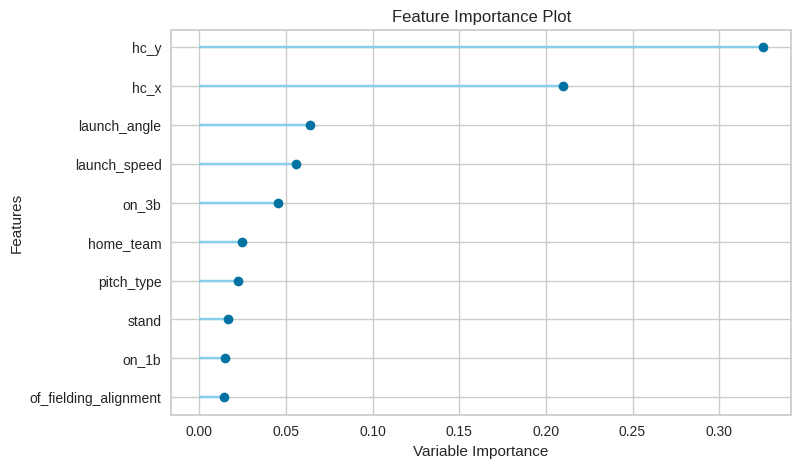

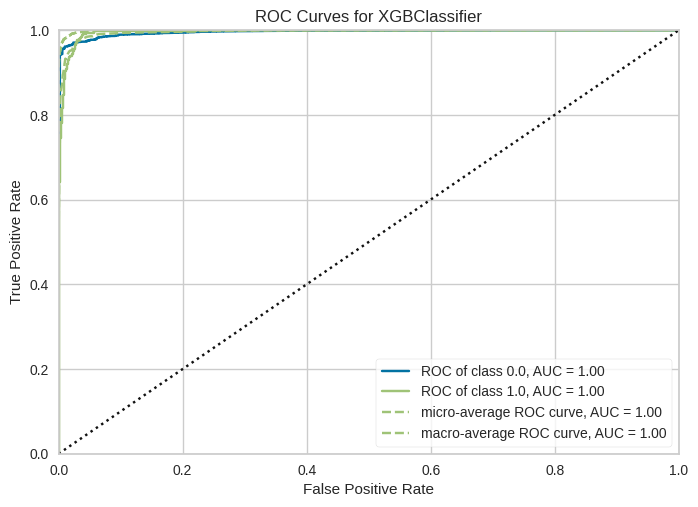

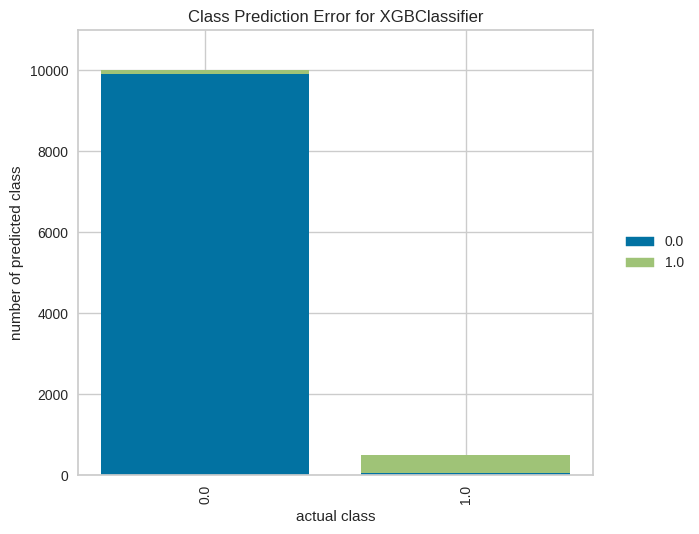

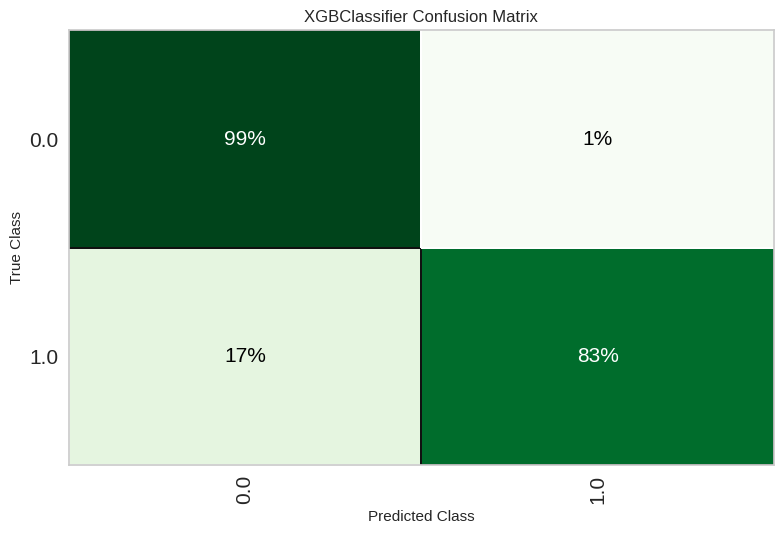

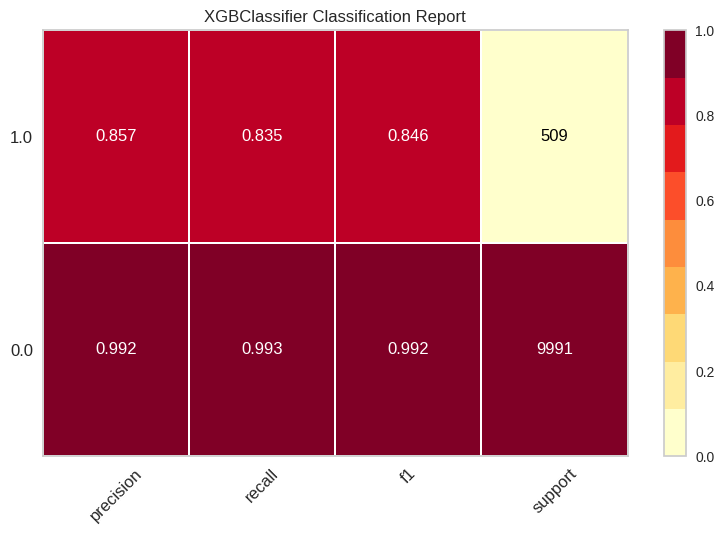

In [50]:
plot_model(best,plot="auc")
plot_model(best,plot="error")
plot_model(best,plot='confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(best,plot="class_report") # error here